In [29]:
import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['age', 'sex', 'cp','trestbps','col','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
feature_cols = ['age', 'sex', 'cp','trestbps','col','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# load dataset
heart = pd.read_csv("Heart Failure data.csv", header=None, names=col_names)
heart = pd.DataFrame(data=heart.iloc[1:304,0:14].values,columns=['age', 'sex', 'cp','trestbps','col','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])

In [30]:
heart.head()

,age,sex,cp,trestbps,col,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
#split dataset in features and target variable
feature_cols = ['age', 'sex', 'cp','trestbps','col','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X = heart[feature_cols] # Features
y = heart.target # Target variable

heart = heart.dropna()

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini')   # gini value for cart algorithem

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   #accuracy on test values
print(metrics.classification_report(y_test,y_pred))


Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.66      0.76      0.70        41
           1       0.77      0.68      0.72        50

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



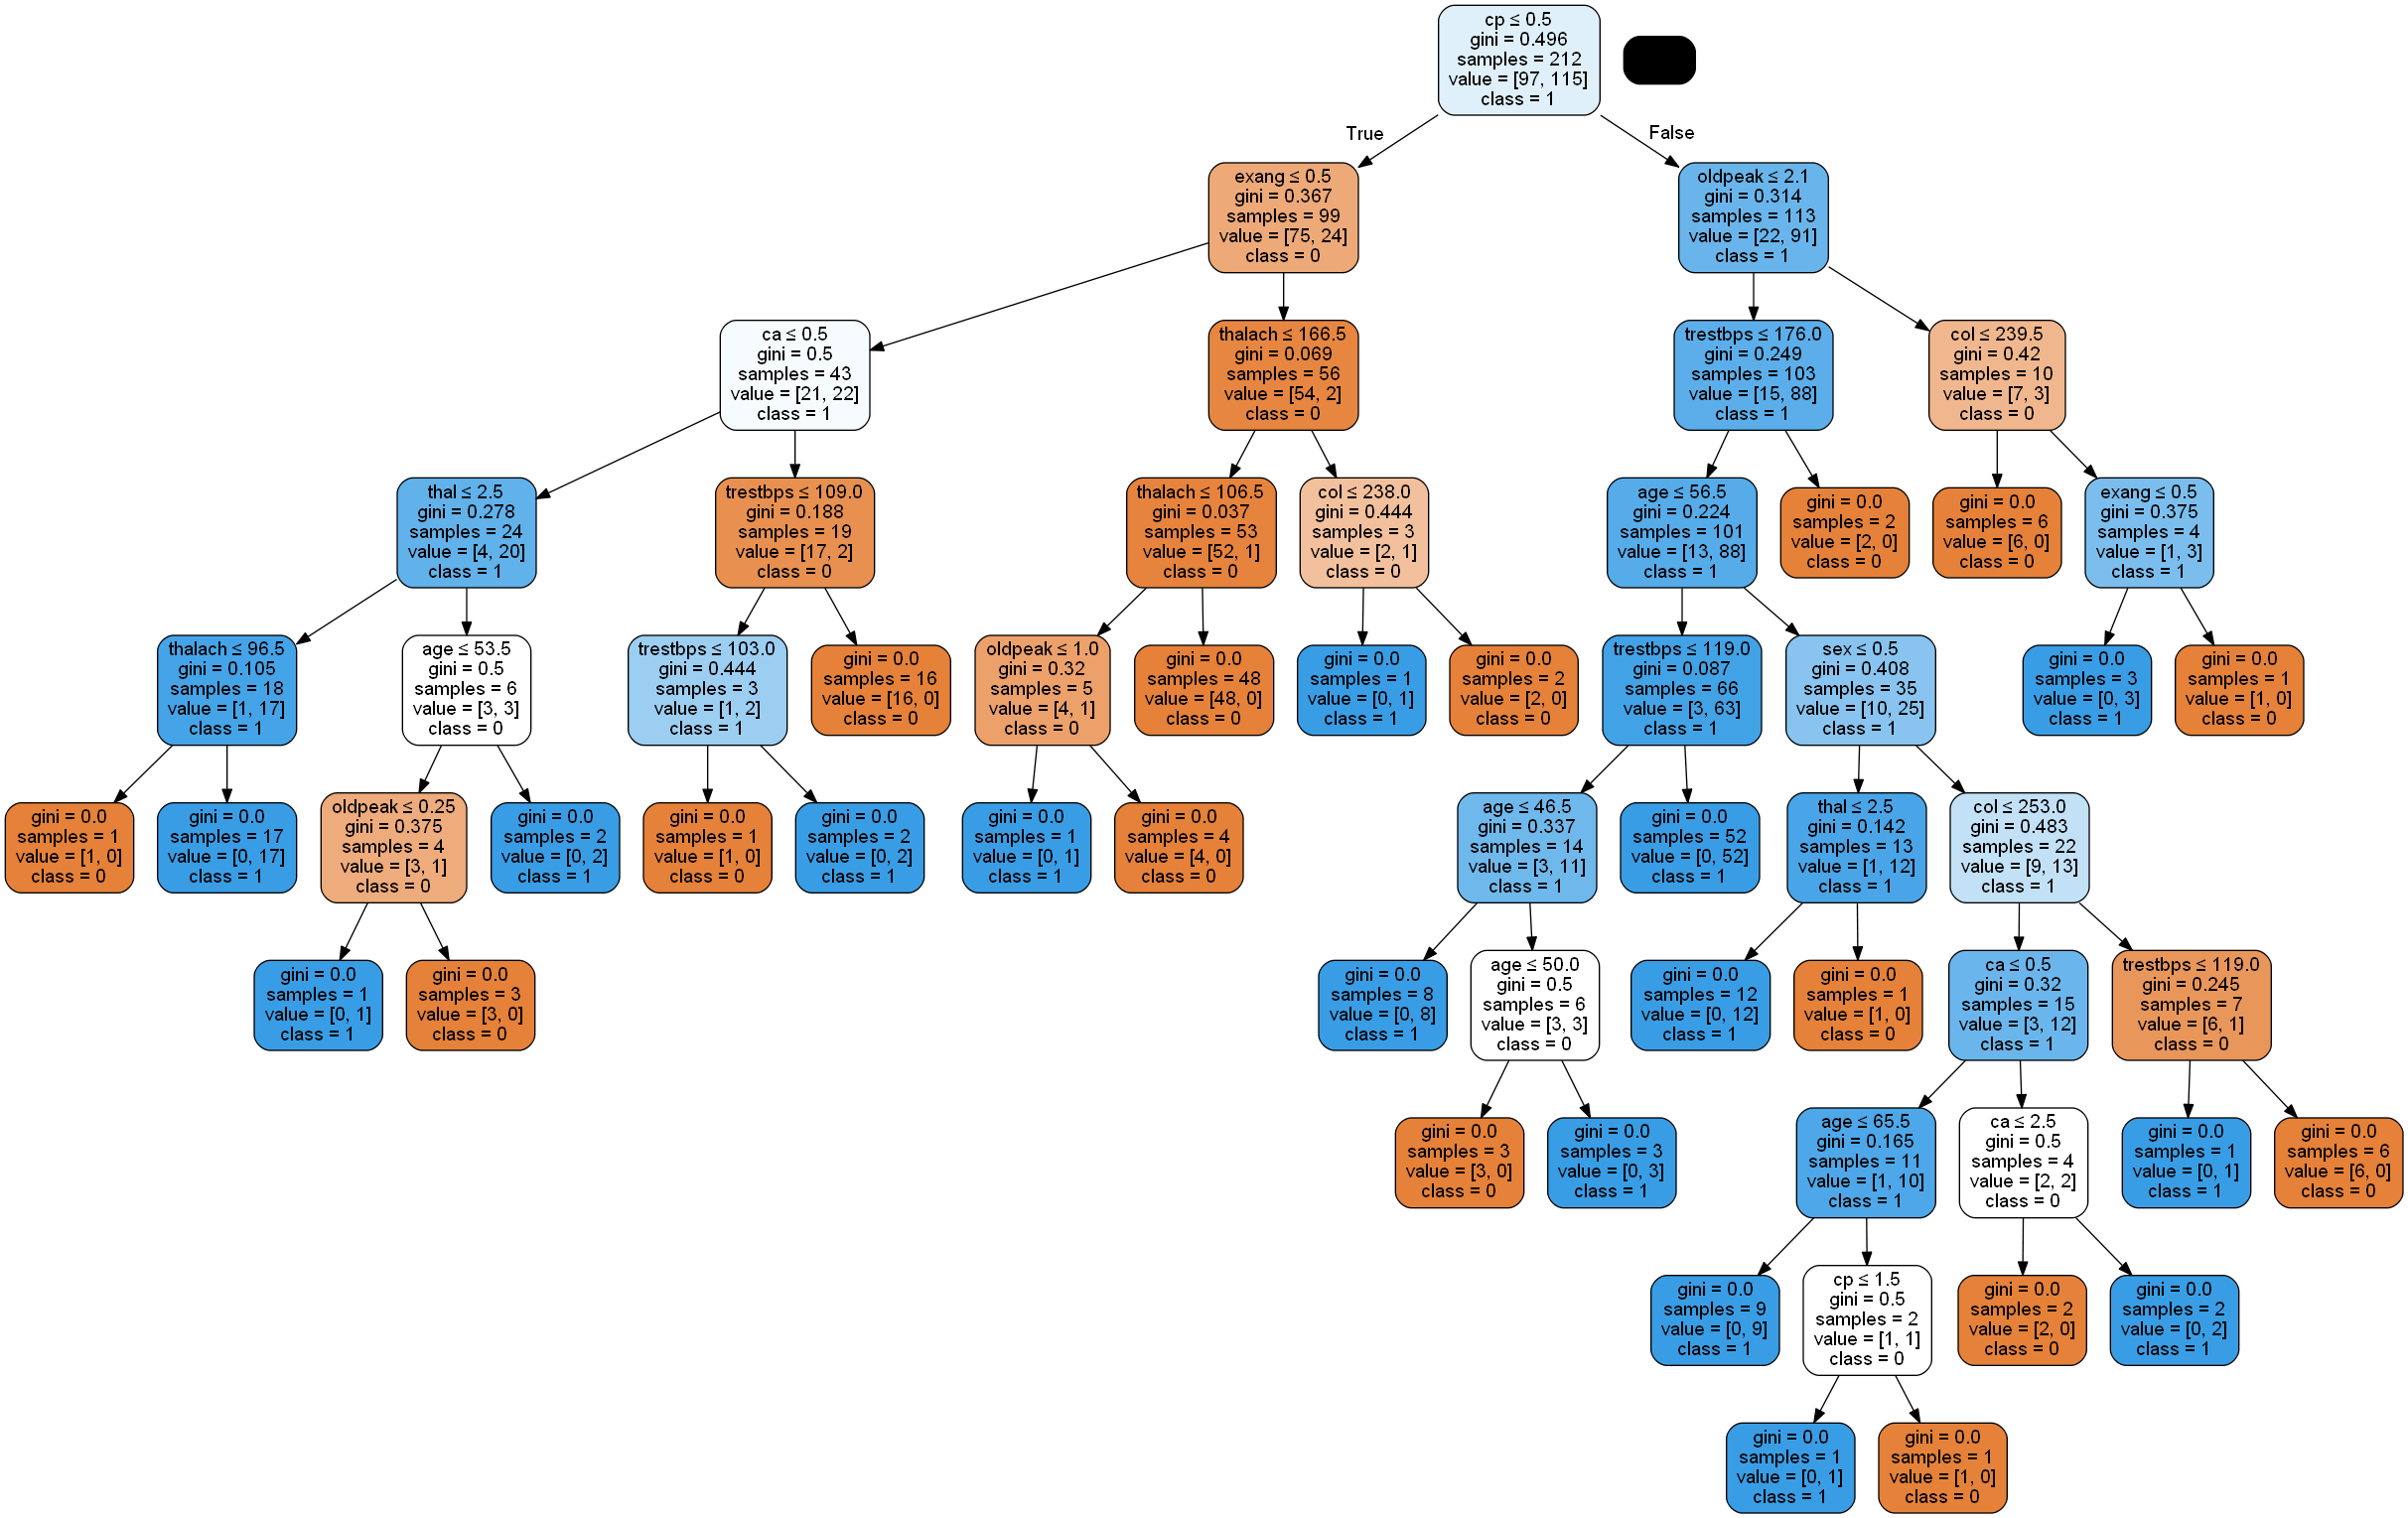

In [34]:
from sklearn.tree import export_graphviz     #tree  
from six import StringIO                  # input output string library
from IPython.display import Image         # image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_fail.png')
Image(graph.create_png())